<a href="https://colab.research.google.com/github/waseemanwar1/AICoverGen/blob/main/Disease_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
!kaggle datasets download -d marslinoedward/disease-prediction-data

Dataset URL: https://www.kaggle.com/datasets/marslinoedward/disease-prediction-data
License(s): Apache 2.0
  0% 0.00/29.8k [00:00<?, ?B/s]
100% 29.8k/29.8k [00:00<00:00, 30.5MB/s]


In [3]:
!unzip disease-prediction-data.zip -d disease-prediction-data

Archive:  disease-prediction-data.zip
  inflating: disease-prediction-data/Testing.csv  
  inflating: disease-prediction-data/Training.csv  


In [7]:
DATA_PATH = "disease-prediction-data/Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

In [15]:
print(data.size)

654360


In [21]:
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
print(disease_counts)
print(temp_df)

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

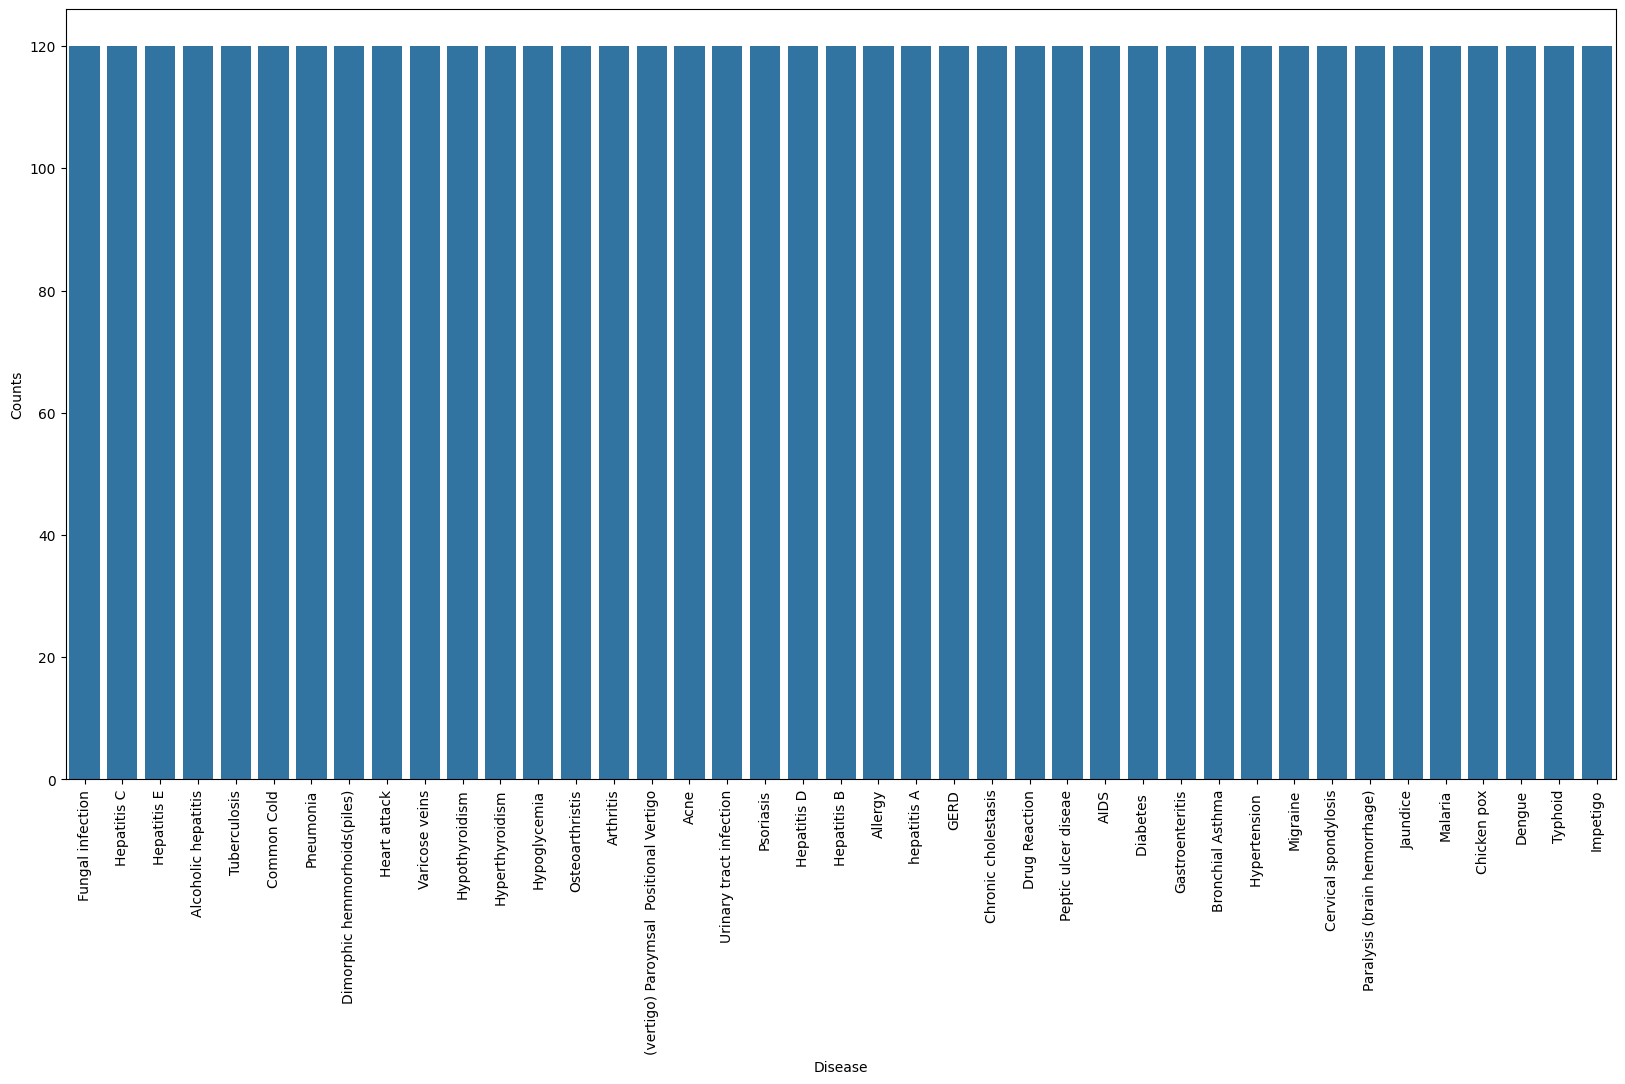

In [25]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [26]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [34]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

In [37]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)
